
Test the fashion retrieval system with visualization.

In [5]:
import sys
from pathlib import Path
sys.path.append('..')

from retriever.search_engine import FashionSearchEngine
from utils.config import config
from PIL import Image
import matplotlib.pyplot as plt

# Load engine
engine = FashionSearchEngine()

Loading search engine...
✓ Loaded FAISS index: 2064 vectors
✓ Loaded metadata: 2064 images
Loading DistilBERT model for smart attribute extraction...


Device set to use cpu


✓ Search engine ready!



In [6]:
def visualize_results(query, top_k=6):
    """Visualize search results"""
    print(f"Searching for: {query}...")
    results, parsed = engine.search(query, top_k=top_k)
    
    # Create plot
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()
    
    fig.suptitle(f'Query: "{query}"', fontsize=16, fontweight='bold')
    
    for i, result in enumerate(results):
        # Use config.ROOT_DIR to construct absolute path
        # This fixes issues when running from notebooks folder
        img_path = config.ROOT_DIR / result['image_path']
        
        try:
            img = Image.open(img_path)
            axes[i].imshow(img)
            axes[i].axis('off')
            axes[i].set_title(
                f"Rank {result['rank']} (Score: {result['score']:.3f})\n" +
                f"Colors: {', '.join(result['metadata']['colors'][:2])}",
                fontsize=10
            )
        except Exception as e:
            print(f"Could not load image {img_path}: {e}")
            axes[i].text(0.5, 0.5, "Image Not Found", ha='center')
    
    plt.tight_layout()
    plt.show()
    
    # Print details
    print(f"\n📊 Parsed Query Details:")
    print(f"  Colors: {parsed['colors']}")
    print(f"  Garments: {parsed['garments']}")
    print(f"  Scenes: {parsed['scenes']}")

Searching for: A person in a yellow raincoat...


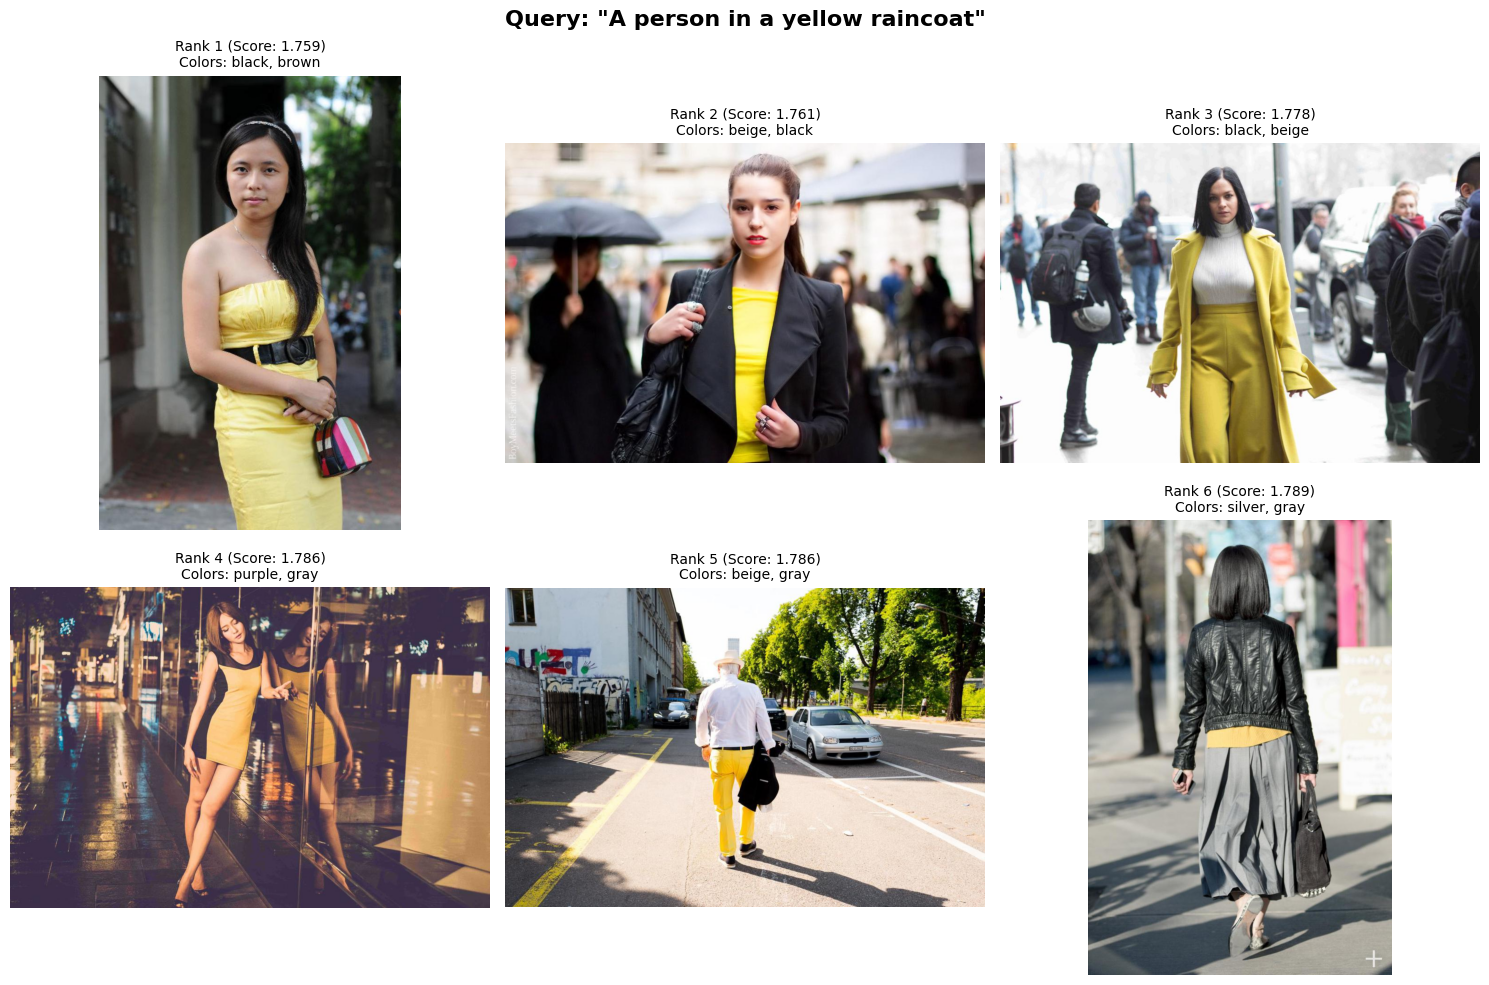


📊 Parsed Query Details:
  Colors: ['yellow']
  Garments: ['yellow raincoat', 'raincoat', 'a yellow raincoat']
  Scenes: ['in a yellow raincoat', 'a yellow raincoat', 'yellow raincoat']


In [11]:
# Test it!
visualize_results("A person in a yellow raincoat")

Searching for: A red tie and a white shirt in a formal setting...


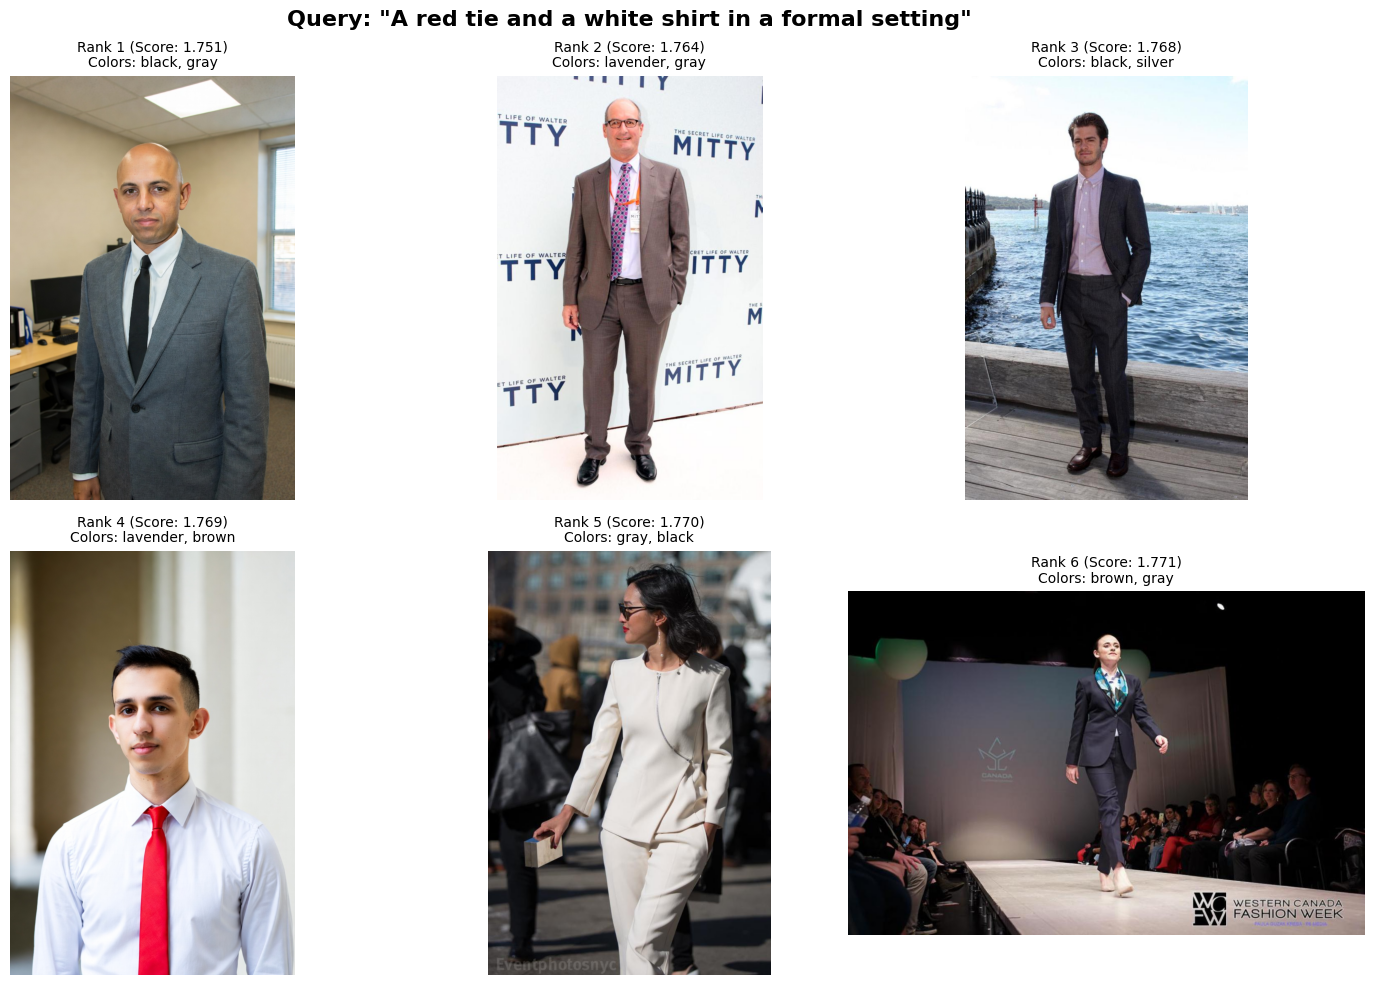


📊 Parsed Query Details:
  Colors: ['red tie and a white', 'white']
  Garments: ['a red tie and a white shirt', 'a red tie']
  Scenes: ['a red tie and a white shirt', 'a red tie']


In [9]:
# Try complex query
visualize_results("A red tie and a white shirt in a formal setting")